# Trabajo Práctico 1 - Cálculo de Ranking Page

## Enunciado

### Pregunta 1 - ¿Por que la matriz A definida en (4) es equivalente a $p \ \mathbf{W} \ \mathbf{D} + e \ z^t$ ? Justificar.

Primero podemos ver que $e \cdot z^t$ tiene todas las filas iguales ya que $e$ es el vector de unos en $\mathbb{R}^n$, la matriz $A$ definida en (4) tiene dos términos, y justamente $e \cdot z^t$ es exactamente uno de ellos y no depende de $i$ (sólo de $j$ ya que debemos ver si es o no igual a 0).

Si quitamos $e \cdot z^t$, nos queda
$pW D=\begin{cases}
(p \cdot w_{ij} )/c_j &\text{si } c_j \neq 0\\
0 &\text{si } c_j = 0
\end{cases}$

Como $p ∈ (0, 1) $ podemos despejar también ese valor.

Para ver que lo que nos queda es $WD$, podemos recordar que $D$ es diagonal y cómo está multiplicando a la derecha de $W$, cada valor de la diagonal multiplicará a su $n-ésima$ columna, justamente, cada valor de la diagonal de $D$ es $1/c_j$. Así queda justificada la equivalencia entre ambas igualdades.

### Pregunta 2 -  ¿Cómo se garantiza existencia de la factorización $LU$? ¿ La matriz $(\mathbf{I} - p \ \mathbf{W} \ \mathbf{D})$ está bien condicionada? ¿Cómo influye el valor de $p$?

Podemos garantizar que existe una factorización LU de nuestra matriz $(\mathbf{I} - p\mathbf{W}\mathbf{D})$ debido su estructura y propiedades con la matriz $\mathbf{I}$. 

Recordemos, primero, que la matriz $\mathbf{W}\mathbf{D}$ es una matriz cuadrada, incluso cuando se la multiplica por el escalar $p$. 
Por lo tanto, la matriz $(\mathbf{I} - p\mathbf{W}\mathbf{D})$ es cuadrada. 

Cómo cada submatriz principal de $(\mathbf{I} - p\mathbf{W}\mathbf{D})$ tiene la misma estructura (tomar una submatriz principal significa tomar $n$ páginas menos en la representación del grafo), basta con probar que la matriz $(\mathbf{I} - p\mathbf{W}\mathbf{D})$ es inversible para probar que todas son inversibles y así ver que existe factorización $\mathbf{L}\mathbf{U}$.

Podemos asegurar que la matriz $(\mathbf{I} - p\mathbf{W}\mathbf{D})$ tiene unos en la diagonal (ninguna columna ni fila se anula) ya que $(p\mathbf{W}\mathbf{D})$ tiene ceros en la diagonal porque $(\mathbf{W})$ tiene ceros en la diagonal (links de una página a si misma).

Desarmandola un poco, obtenemos una matriz bastante similar a la $\mathbf{I}$, con unas modificaciones debido a 
$p\mathbf{W}\mathbf{D}$. Pero como $p ∈ (0, 1) $, los valores de $p\mathbf{W}\mathbf{D}$ van a ser menores que 1, y muy similar a la matriz $\mathbf{I}$, por lo que va a seguir manteniendo pripiedades similares a la misma, lo que facilitaria la posibilidad de hallar una factrizacion LU.

que significa que los valores sean menores que uno para calcular la inversa?
    probe meter matrices no inversibles, con p=1 falla pero con p=0.9 funciona, banco. pero no entiendo.
a qué te referís con 'similar'???

Tambien, el hecho de que la matriz $(\mathbf{I} - p\mathbf{W}\mathbf{D})$ sea "similar" a $\mathbf{I}$, nos muestra que ninguna fila o columna se anula completamente. Esto nos ayuda a ver que todas las sumbatrices principales de $(\mathbf{I} - p\mathbf{W}\mathbf{D})$ van a ser inversibles, ya que va a seguir manteniendo la misma estructura que la matriz completa, pero con dimensiones más pequeñas.

Estas dos condiciones garantizan que el determinante de $(\mathbf{I} - p\mathbf{W}\mathbf{D})$ sea distinto de cero, y que no haya divisiones por cero durante la eliminación gaussiana.

Ademas podemos ver que: 

El condicionamiento de la matriz $(\mathbf{I} - p\mathbf{W}\mathbf{D})$ se puede calcular utilizando su número de condición, que determina cuán sensible es la solución de un sistema de ecuaciones lineales ante pequeñas perturbaciones en los datos de entrada. Cuanto más cercano a 1 esté el número de condición, mejor condicionada estará dicha matriz; y a mayor número de condición, peor condicionada.

En este caso, el número de condición de la matriz $(\mathbf{I} - p\mathbf{W}\mathbf{D})$ se calcula de la siguiente manera:

$$\text{cond}((\mathbf{I} - p\mathbf{W}\mathbf{D})) = \left|(\mathbf{I} - p\mathbf{W}\mathbf{D})\right| \cdot \left|(\mathbf{I} - p\mathbf{W}\mathbf{D})^{-1}\right|
$$

Como mencionamos antes, a mayor número de condición de una matriz, peor condicionada estará. Esto conlleva a que pequeñas variaciones en los datos puedan modificar enormemente la solución. En este caso, el valor de $p$ juega un papel importante en este aspecto. 

* Un valor de $p$ cercano a 1 indica que "el usuario" es más propenso a seguir enlaces y se quede en páginas web relacionadas en la que estás. Sin embargo, un número $p$ muy cercano a 1 es contraproducente, ya que puede aumentar el condicionamiento de la matriz $(\mathbf{I} - p\mathbf{W}\mathbf{D})$ y así arruinar la precisión.

* Por otro lado, si $p$ es cercano a 0, significa que es más probable que decidas pasar a una página web completamente nueva en lugar de seguir enlaces.

creo que está bien en general la respuesta pero explicaría mejor a que te referis con mejor o peor, yo creo que en este caso no es mejor ni peor, ya que justamente p es el parametro que el admin regula para subir o bajar el grado de aleatoriedad del sistema
y en realidad me gustaría fijarme si hay alguna cuentita más que hacer con respecto a la condición, para ver si es posible acotarla. podemos preguntar entre compañeros el martes

---

## Implementación

Implementar la factorización $LU$ para resolver el sistema de ecuaciones (6) que permite hallar la solución buscada (es decir, el ranking de páginas). Se podrá utilizar la función **scipy.linalg.solve_triangular** para resolver sistemas triangulares.

En el siguiente cuerpo de la notebook se genera un test que va a evaluar la función que resuelve el sistema a través de un test unitario. La resolución debe realizarse en el archivo **funciones.py** que acompaña el **template-alumnos**.

In [2]:
from funciones import *

### Test Unitario
En el archivo funciones.py hay que implementar la función que obtienen el ranking de las páginas.
Se espera que el llamado a la siguiente función arroje un valor esperado

**************************************************
Test unitario 1
[[ 1.    0.    0.    0.    0.   -0.1   0.   -0.25  0.    0.    0.    0.  ]
 [ 0.    1.    0.    0.    0.   -0.1   0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    1.    0.    0.   -0.1   0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    1.    0.   -0.1   0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    1.   -0.1   0.    0.    0.    0.    0.    0.  ]
 [-0.25 -0.5  -0.5  -0.5  -0.5   1.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    1.   -0.25 -0.5  -0.5  -0.5  -0.5 ]
 [-0.25  0.    0.    0.    0.    0.   -0.1   1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   -0.1   0.    1.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   -0.1   0.    0.    1.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   -0.1   0.    0.    0.    1.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   -0.1   0.    0.    0.    0.    1.  ]]
0.1811594202898551
BIEN! - Paso 

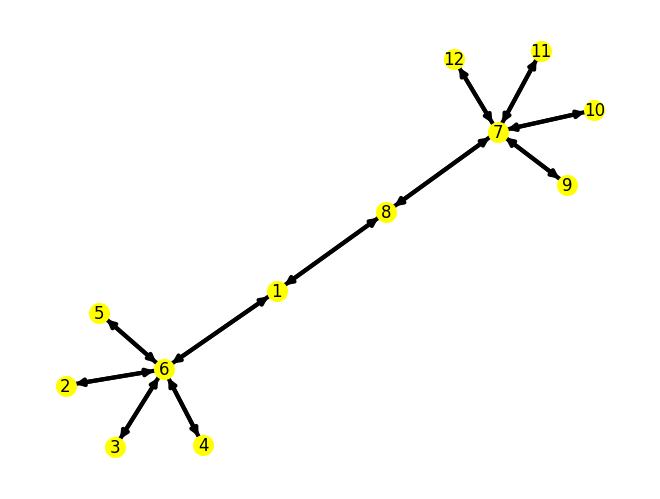

In [3]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test unitario 1')
try:
    res = obtenerMaximoRankingScore(W, p)
    print(res)
    assert(np.isclose(res, 0.1811, atol=1e-4))
except:
    print('OUCH!! - No paso el test unitario')
else:
    print('BIEN! - Paso correctamente el test unitario')
print('*'*50)


### Test Unitarios Adicionales

El grupo **deberá** proponer al menos 3 instancias de prueba no triviales, dos de las cuales deben ser de tipo TODOS LOS NODOS CONECTADOS, y otra de tipo NINGUNO CONECTADO. La tercera instancia queda a criterio del grupo.

Para el análisis, guiarse y responder las siguientes preguntas: 

* ¿Cómo es el ranking obtenido en cada caso de acuerdo a la estructura del grafo páginas? 
* ¿Qué conclusiones pueden sacar de la interpretación de los resultados?

Graficar los grafos usando las funciones en el **funciones.py**.

---

## Enunciado

Sobre los casos de test que se encuentran en el folder `tests`, se pide realizar los análisis siguientes para todos los grafos del folder.

### Análisis Cuantitativo

Para el análisis cuantitativo, se pide, como mínimo, estudiar los tiempos de procesamiento en función del tamaño del grafo de páginas y de la densidad del mismo. Para esto, se espera que presenten gráficos mostrando los tiempos de ejecución para obtener la solución en función de la cantidad de nodos/links de diferentes grafos de páginas aleatorios.


### Análisis Cualitativo

Para el análisis cualitativo se deberán estudiar los rankings obtenidos, en función de la estructura del grafo, y del valor de $p$. Para esto, se espera que presenten gráficos mostrando las probabilidades de las páginas mejor rankeadas en función del valor de $p$. 


### Dos estrellas

Para el caso **test_dosestrellas.txt** se pregunta: 

¿Cuál es la mínima cantidad de links que se deben agregar para que la pagina correspondiente al nodo 1 quede primera en el ranking? ¿ Cómo se modificó la conectividad? Analizar.

